In [6]:
import easyocr
import matplotlib.pyplot as plt
import cv2
import time
import numpy as np



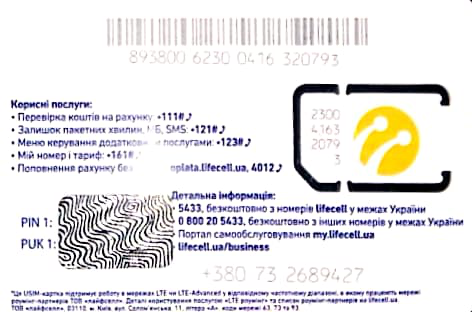

In [24]:

import PIL
from PIL import ImageDraw
im = PIL.Image.open("card2.png")

im




In [25]:
reader = easyocr.Reader(['en'], gpu=True)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [15]:

bounds = reader.readtext('card2.png')
bounds

[([[125, 47], [257, 47], [257, 67], [125, 67]], '2o2W(', 0.13507416758029495),
 ([[265, 49], [341, 49], [341, 69], [265, 69]],
  '0320/o-',
  0.16109897912197696),
 ([[8, 96], [93, 96], [93, 114], [8, 114]],
  'Kopwcwl nocnyrye',
  0.09842069237038624),
 ([[17, 111], [101, 111], [101, 125], [17, 125]],
  'Mcpcolp" Kotlitin',
  0.15343608990109714),
 ([[114, 114], [152, 114], [152, 122], [114, 122]],
  'Edet',
  0.04444843903183937),
 ([[160, 112], [192, 112], [192, 120], [160, 120]],
  'Aat',
  0.005712042855817878),
 ([[309, 107], [343, 107], [343, 123], [309, 123]], '250', 0.8654487997276888),
 ([[18, 126], [60, 126], [60, 134], [18, 134]], 'Eanwor', 0.04855854880921257),
 ([[108, 126], [144, 126], [144, 134], [108, 134]],
  'KNiaa',
  0.012410490559458365),
 ([[165, 123], [229, 123], [229, 137], [165, 137]],
  '5"5 .1710}',
  0.20258464694604003),
 ([[311, 123], [343, 123], [343, 137], [311, 137]],
  '-io5',
  0.08769232034683228),
 ([[17, 134], [143, 134], [143, 149], [17, 149]],
 

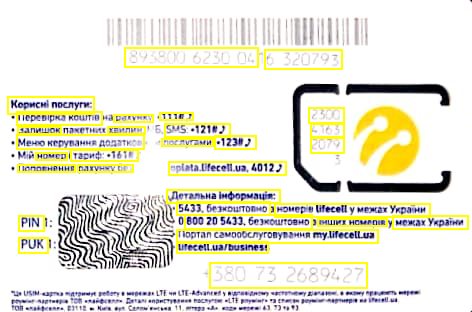

In [17]:

def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)


In [18]:
len(bounds)


31

In [26]:

for i in bounds:
    print(i[:-1])

([[125, 47], [257, 47], [257, 67], [125, 67]], '2o2W(')
([[265, 49], [341, 49], [341, 69], [265, 69]], '0320/o-')
([[8, 96], [93, 96], [93, 114], [8, 114]], 'Kopwcwl nocnyrye')
([[17, 111], [101, 111], [101, 125], [17, 125]], 'Mcpcolp" Kotlitin')
([[114, 114], [152, 114], [152, 122], [114, 122]], 'Edet')
([[160, 112], [192, 112], [192, 120], [160, 120]], 'Aat')
([[309, 107], [343, 107], [343, 123], [309, 123]], '250')
([[18, 126], [60, 126], [60, 134], [18, 134]], 'Eanwor')
([[108, 126], [144, 126], [144, 134], [108, 134]], 'KNiaa')
([[165, 123], [229, 123], [229, 137], [165, 137]], '5"5 .1710}')
([[311, 123], [343, 123], [343, 137], [311, 137]], '-io5')
([[17, 134], [143, 134], [143, 149], [17, 149]], 'Mcho Ncoyt,IMme 00386*0')
([[162, 138], [212, 138], [212, 146], [162, 146]], 'Acruttm')
([[215, 135], [255, 135], [255, 149], [215, 149]], '4230}')
([[311, 137], [343, 137], [343, 153], [311, 153]], '207$')
([[36, 152], [66, 152], [66, 160], [36, 160]], 'Houdn')
([[71, 149], [137, 149],

In [3]:
#reader = easyocr.Reader(['en'], gpu=True)
vid = cv2.VideoCapture("card2.png")
skip_frame = True


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [4]:
while(True):
  a = time.time()
  ret, img = vid.read()

  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  result = reader.readtext(gray)
  text = ""


  for res in result:
    text += res[1] + " "
  cv2.putText(img, text, (50,70), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (50,50,255), 2)  


  b = time.time()
  fps = 1/(b-a)
  cv2.line(img, (20,25), (127, 25), [85,45,255], 30)
  cv2.putText(img, text, (50,70), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 1, (50,50,255), 2)
  cv2.imshow("result", img)


  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

  print(fps)
  print(text) 


0.13966262632283202
28xJ62W @ 0320/o- Kocmcwl nocnyns ncozolpxa Kolitin MJeJry Aa 250 Eanwor r nua 6 9"'5 .1210} -i65 Melorchtn te aoaatk#r Morvtum +1230} 207$ Hoycoitjens -ete Tccorhrhhm Oattt Fplela Leccllux 4012 } McrantMa Ixeopusutr: 52J} Gfioutonkd Koucn W Ulecell y Menret Yrdn HK PIN I: 00070 5611.6"]rcutoa40 uit) Hcupniby Memax Yapatra Noptan c unq cniron)e Mnmy lilccellux PUK Wczellua (businass 580 73 2689/.27 


error: OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-gt63l4kp/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
